### TMA4215 Numerisk Matematikk 

Høst 2021 – Tuesday, October 19, 2021

R. Bergmann, E. Çokaj, O. P. Hellan 

# Project 2: Bézier Curves and Interpolation

### Notes

**Groups.** This project is a group project and can be solved in groups of _up to three_ students. Feel free to use for example the Forum to find each other. Eventually it will be possible to register groups in Inspera. One person (per group) can create a group and will get a PIN code which can be used by the other group members for registering.

**Requirements for submission.** The submission is in [Inspera](https://ntnu.inspera.no/). Each group must submit their onw report. It is not allowed to copy from other groups.

All code – also the tests – should be in individual cells that can just be run (as soon as the necessary functions are defined). Functions should only be used in cells _after_ their definition, such that an evaltuation in order of the notebook does not yield errors.

It is not possible to have an extension for this project.

**Supervision.** For questions the usual time, Thursday, 18.15–20.00 can be used. Questions can also be asked in the Mattelab forum.

### Submission Deadline
Tuesday, November 9, 2021.

## Introduction

In this project we consider another possibility to perform interpolation with piecewise polynomials, namely from the family of parametrized curves.

Let $\mathbf p_0,\ldots, \mathbf p_n\in \mathbb R^d$ (usually $d=2$ or $d=3$) denote $n+1$ ordered points.

Then the $n$th degree Bézier curve is defined by

$$
\mathbf c(t) = \mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) = \sum_{i=0}^{n} B_{i,n}(t)\mathbf{p}_i,
$$

where $B_{n,i}(t)$ are the $n$th degree _Bernstein polynomials_. We use the first notation, $\mathbf c(t)$ when the points are clear from context, and the second, $\mathbf b(t; \mathbf p_0,\ldots,\mathbf p_n)$ to emphasize the dependency of the nodes and/or the degree $n$.

$$
  B_{i,n}(t) = {n \choose i}t^i(1-t)^{n-i}, \qquad i=0,\ldots,n,
$$

where ${n \choose i} = \frac{n!}{i!(n-i)!}$ denotes the binomial coefficient.

To get familiar with the first few Bernstein polynomials it might be good to write down $B_{0,0}, B_{0,1}, B_{1,1}, B_{0,2}, B_{1,2},$ and $B_{2,2}.$ 

## Problem 1: Properties of Bernstein polynomials

Let $n\in \mathbb N$ be given. We consider the Bernstein polynomials $B_{i,n}(t)$, $i=0,\ldots,n$.

1. Show that $B_{i,n}(t) \geq 0$ for all $t\in [0,1]$.

We want to show that 

$$
{n \choose i}t^i(1-t)^i \geq 0, \quad t \in [0, 1].
$$

Since $n$ choose $i$ is a positive constant for all $n = 0, 1, ...$ with corresponding $i = 0, ..., n$ we can rewrite the equation above to the statement

$$
t^i(1-t)^i \geq 0, \quad t \in [0, 1].
$$

The first factor $t^i$ is non-negative for all $t \geq 0$. The second factor $(1-t)^i$ is non-negative for $t \leq 1$. Thus, we can conclude that the product of these factor is non-negative on the interval where both factors are non-negativen, namely $t \in [0,1]$. The inequality holds and $B_{i,n}(t) \geq 0$ for all $t\in [0,1]$.

2. Show that the Bernstein polynomials for $0<i<n$ can be recursively defined by
  
   $$
   B_{i,n}(t) = (1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t), \qquad t \in [0,1].
   $$
  
   How does this look like for $B_{0,n}$ and $B_{n,n}$? 

We write out the definition as follows
$$
(1-t)B_{i, n-1} + tB_{i-1, n-1} = (1-t)  \frac{(n-1)!}{i!(n-1-i)!}t^{i}(1-t)^{n-1-i} + t\frac{(n-1)!}{(i-1)!(n-1-(i-1))!} t^{i-1}(1-t)^{n-1-(i-1)} =
$$
$$
\frac{(n-1)!}{i!(n-i-1)!}t^i (1-t)^{n-i} + \frac{(n-1)!}{(i-1)!(n-i)!}t^i (1-t)^{n-i} =
$$
$$
(n-1)!t^i(1-t)^{n-i}\left(\frac{1}{i!(n-i-1)!} + \frac{1}{(i-1)!(n-i)!}\right) 
$$
where 
$$
\left(\frac{1}{i!(n-i-1)!} + \frac{1}{(i-1)!(n-i)!}\right)= \left(\frac{n-i}{i!(n-i)!} + \frac{i}{i!(n-i)!}\right) = \frac{n}{i!(n-i)!}
$$
So we obtain 
$$
(n-1)!t^i(1-t)^{n-i}\left(\frac{n}{i!(n-i)!}\right)  = \frac{n!}{i!(n-i)!}!t^i(1-t)^{n-i} = \binom{n}{i} t^i(1-t)^{n-i} = B_{i, n}
$$
which is what we were to show
We have 
$$
B_{0, n} = (1-t)^n
$$
$$
B_{n, n} = t^n
$$

3. Show that the $B_{i,n}(t)$ form a partition of unity, i.e.
   $$
   \sum_{i=0}^n B_{i,n}(t) = 1 \qquad \text{ for } t \in [0,1].
   $$
   _Hint_: Use induction by $n$.

Step 1 (n = 0):
$$
B_{0,0}(t) = {0 \choose 0}t^0(1-t)^0 = 1
$$

Step 2 (n = k):

We assume that the following holds:
  $$
   \sum_{i=0}^k B_{i,k}(t) = 1 \qquad \text{ for } t \in [0,1].
   $$

Step 3 (n = k+1):

We now want to prove that this implies that
  $$
   \sum_{i=0}^{k+1} B_{i,k+1}(t) = 1 \qquad \text{ for } t \in [0,1]
   $$
holds as well. 

We start by rewriting the equation to the recursive formula:
$$
   \sum_{i=0}^{k+1} (1-t)B_{i,k}(t) + tB_{i-1,k}(t) = \underbrace{\sum_{i=0}^{k+1} B_{i,k}(t)}_{1+B_{k+1,k}(t)} - \sum_{i=0}^{k+1} t B_{i,k}(t) + \sum_{i=0}^{k+1} tB_{i-1,k}(t)=  1,
   $$
where we used the assumption (step 2) to replace the first sum with $1 + B_{k+1, k}(t)$. The 1's cancel, and to simplify the equation even more we change the variable of index in the last summation term and we get
$$
B_{k+1,k}(t) - \sum_{i=0}^{k+1} t B_{i,k}(t) + \sum_{m=-1}^{k} tB_{m,k}(t) = B_{k+1,k}(t) + tB_{-1,k}(t) -  t B_{k+1,k}(t)= 0.
$$
If we now prove that $B_{k+1,k}(t) = B_{-1,k}(t) = 0$, our assumtion is proven correct.

For the $B_{i,n}$ we have the factor
$$
{n \choose i} = \frac{n!}{i!(n-i)!} = \frac{n(n-1)...(n-i+2)(n-i+1)}{i!}.
$$
If we evaluate $B_{k+1,k}$ we get 
$$
{k \choose k+1} = \frac{k(k-1)...(k-k-1+2)\overbrace{(k-k-1+1)}^0}{(k+1)!} = 0.
$$
Another way of writing the factor is
$$
{n \choose i} = \frac{n!}{i!(n-i)!} = \frac{n(n-1)...(i+2)(i+1)}{(n-i)!}.
$$
If we evaluate $B_{-1,k}$ we get 
$$
{k \choose -1} = \frac{k(k-1)...(-1+2)\overbrace{(-1+1)}^0}{(k-(-1))!} = 0.
$$
We have shown that the terms $B_{-1,k}$ and $B_{k+1,k}$ is equal to zero and the equation 
$$
B_{k+1,k}(t) + tB_{-1,k}(t) -  t B_{k+1,k}(t)= 0
$$
holds. We can conclude that under the assumption that the sum of Bernstein-polynomials equals 1.

4. Show that the derivative is given by
   
   $$
   B_{i,n}'(t) =  n(B_{i-1,n-1}(t) - B_{i,n-1}(t))
   $$
   
   with $B_{-1,n-1}(u) \equiv B_{n,n-1}(u) \equiv 0$.

We use the chain rule and differentiate w.r.t. $t$
$$
\frac{d }{d t}B_{i, n} = \frac{d }{d t}\left(\binom{n}{i}t^{i}(1-t)^{n-i}\right)=\frac{n!}{i!(n-i)!} it^{i-1}(1-t)^{n-i} - \frac{n!}{i!(n-i)!}t^{i}(n-i)(1-t)^{n-i-1} = 
$$
$$
\frac{n(n-1)!}{(i-1)!(n-i)!}t^{i-1}(1-t)^{n-i} - \frac{n(n-1)!}{i!(n-i-1)!}t^{i}(1-t)^{n-i-1}=
$$
$$
n\left(\frac{(n-1)!}{(i-1)!(n-i)!}t^{i-1}(1-t)^{n-i} - \frac{(n-1)!}{i!(n-i-1)!}t^{i}(1-t)^{n-i-1}\right)=n(B_{i-1, n-1}-B_{i, n-1})
$$

5. Implement a function `Bernstein(i,n,t)` that evaluates $B_{i,n}$ at $t$ and plot all functions $B_{i,n}$, $i=0,\ldots,n$ for $n=3$ and $n=9$.

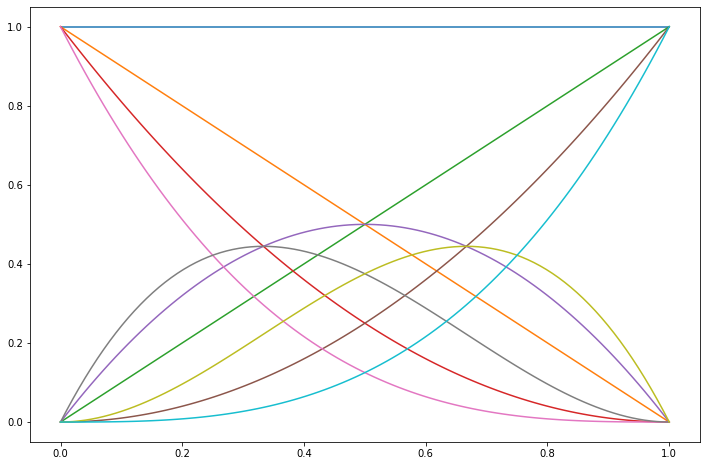

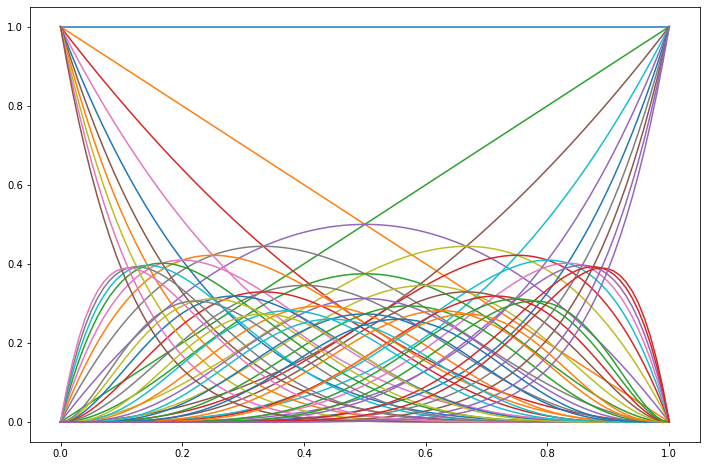

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math


def Bernstein(i, n, t):
    binom=math.factorial(n)/(math.factorial(i)*math.factorial(n-i))
    return binom*t**(i)*(1-t)**(n-i)


def plotBernstein(n, t):
    for j in range(n+1):
        for k in range(j+1):
            plt.plot(t, Bernstein(k, j, t), label=(r'$B_{{{}{}}}$'.format(k, j)))

            
t=np.linspace(0, 1, 100)
plt.figure(0, figsize=(12, 8))
plotBernstein(3, t)
plt.show()

plt.figure(1, figsize=(12, 8))
plotBernstein(9, t)
plt.show()

## Problem 2: Properties of (composite) Bézier curves

We consider the points $\mathbf p_0,\ldots,\mathbf p_n \in \mathbb R^d$ and $\mathbf q_0,\ldots \mathbf q_n\in \mathbb R^d$ and their corresponding Bézier curves $\mathbf c(t) = \mathbf b(t; \mathbf p_0,\ldots,\mathbf p_n)$ and $\mathbf d(t) = \mathbf b(t; \mathbf q_0,\ldots, \mathbf q_n)$, respectively.

In this problem, we will also consider _composite Bézier curves_, or piecewise Bézier curves, e.g. a curve $\mathbf s \colon [0,2] \to \mathbb R^d$ defined by

$$
\mathbf s(t) = \begin{cases}
  \mathbf c(t) & \text{ for } 0 \leq t < 1\\
  \mathbf d(t-1) & \text{ for } 1 \leq t \leq 2.
\end{cases}
$$

1. Compute the first two derivatives $\mathbf c'(t)$ and $\mathbf c''(t)$ of $\mathbf c(t).$

We write out the definition of $\mathbf{c}(t)$,
$$
\mathbf c(t) = \sum_{i=0}^{n}\underbrace{{n \choose i}t^i(1-t)^{n-i}}_{B_{i,n}(t)}\mathbf{p}_i,, \qquad i=0,\ldots,n,\mathbf{p}_i,
$$

We simply apply the chain and product rule for each term

$$
\frac{d}{dt}\mathbf c(t) = \sum_{i=0}^{n} {n \choose i}\mathbf{p}_i\bigg[\frac{d}{dt}(t^{i})(1-t)^{n-i} - t^{i}\frac{d}{dt}((1-t)^{n-i})\bigg]= \sum_{i=0}^{n} {n \choose i}\mathbf{p}_i\bigg[it^{i-1}(1-t)^{n-i} - t^{i}(n-i)(1-t)^{n-i-1}\bigg], \qquad i=0,\ldots,n.
$$

We differentiate once again and again use product and chain rule:

$$
\frac{d^2}{dt^2}\mathbf c(t) = \sum_{i=0}^{n} {n \choose i}\mathbf{p}_i\bigg[i\bigg\{\frac{d}{dt}(t^{i-1})(1-t)^{n-i} + (t^{i-1})\frac{d}{dt}(1-t)^{n-i} \bigg\}

 - (n-i)\bigg\{\frac{d}{dt}(t^{i})(1-t)^{n-i-1} + (t^{i})\frac{d}{dt}(1-t)^{n-i-1}\bigg\}\bigg]
$$

$$
=\sum_{i=0}^{n} {n \choose i}\mathbf{p}_i\bigg[i\bigg\{(i-1)t^{i-2}(1-t)^{n-i} - (t^{i-1})(n-i)(1-t)^{n-i-1} \bigg\}
 - (n-i)\bigg\{i(t^{i-1})(1-t)^{n-i-1} - t^{i}(n-i-1)(1-t)^{n-i-2}\bigg\}\bigg]
$$

$$
=\sum_{i=0}^{n} {n \choose i}\mathbf{p}_i\bigg[i(i-1)t^{i-2}(1-t)^{n-i} - 2i(t^{i-1})(n-i)(1-t)^{n-i-1} 
  + (n-i)t^{i}(n-i-1)(1-t)^{n-i-2}\bigg]
$$

2. What values does $\mathbf c(t)$ attend at its end points? State $\mathbf c(0)$ and $\mathbf c(1).$

We calculate its endpoints:
$$
\mathbf c(0) = \sum_{i=0}^{n}{n \choose i}0^i(1-0)^{n-i}\mathbf{p}_i ={n \choose 0}0^0(1-0)^{n}\mathbf{p}_0 = \mathbf{p}_0 
$$
and 
$$
\mathbf c(1) = \sum_{i=0}^{n}{n \choose i}1^i(1-1)^{n-i}\mathbf{p}_i = {n \choose n}1^n(1-1)^{n-n}\mathbf{p}_n = \mathbf{p}_n
$$

3. Prove that the following properties hold:
   1. $\mathbf c'(0) = n(\mathbf p_1-\mathbf p_0),$
   2. $\mathbf c''(0) = n(n-1)(\mathbf p_0-2\mathbf p_1 + \mathbf p_2),$
   3. $\mathbf c'(1) = n(\mathbf p_n-\mathbf p_{n-1}),$
   4. $\mathbf c''(1) = n(n-1)(\mathbf p_n-2\mathbf p_{n-1} + \mathbf p_{n-2}).$

$$
\mathbf c'(0) = \sum_{i=0}^{n} {n \choose i}\mathbf{p}_i\bigg[i0^{i-1}(1-0)^{n-i} - 0^{i}(n-i)(1-0)^{n-i-1}\bigg]
=\sum_{i=0}^{n} {n \choose i}\mathbf{p}_i\bigg[i\delta_{i,1} -\delta_{i,0}(n-i)\bigg]
$$
$$
=-{n \choose 0}\mathbf{p}_0 (n-0) + 
{n \choose 1}\mathbf{p}_1 = n(\mathbf p_1 - \mathbf p_0)
$$

$$
\mathbf c'(1) =\sum_{i=0}^{n} {n \choose i}\mathbf{p}_i\bigg[i1^{i-1}(1-1)^{n-i} - 1^{i}(n-i)(1-1)^{n-i-1}\bigg] = 
\sum_{i=0}^{n} {n \choose i}\mathbf{p}_i\bigg[i\delta_{i,n} - (n-i)\delta_{i, n-1}\bigg] 
$$

$$
= -{n \choose n-1}(n-(n-1))\mathbf p_{n-1} + {n \choose n} n \mathbf p_n= n(\mathbf p_n - \mathbf p_{n-1})
$$

$$
\mathbf c''(0) =\sum_{i=0}^{n} {n \choose i}\mathbf{p}_i\bigg[i(i-1)0^{i-2}(1-0)^{n-i} - 2i(0^{i-1})(n-i)(1-0)^{n-i-1} 
  + (n-i)0^{i}(n-i-1)(1-0)^{n-i-2}\bigg]
$$
$$
  =\sum_{i=0}^{n} {n \choose i}\mathbf{p}_i\bigg[i(i-1)\delta_{i, 2} - 2i\delta_{i, 1}(n-i)
  + (n-i)\delta_{i,0}(n-i-1)\bigg]
$$
$$
= {n \choose 0}\mathbf{p}_0(n-0-1)  -{n \choose 1}\mathbf{p}_1 2(n-1) +(n-0){n \choose 2}\mathbf{p}_2 2(2-1)
$$
$$
= n(n-1)(\mathbf p_0-2\mathbf p_1 + \mathbf p_2)
$$

$$
\mathbf c''(1) =\sum_{i=0}^{n} {n \choose i}\mathbf{p}_i\bigg[i(i-1)1^{i-2}(1-1)^{n-i} - 2i(1^{i-1})(n-i)(1-1)^{n-i-1} 
  + (n-i)1^{i}(n-i-1)(1-1)^{n-i-2}\bigg]
$$
$$
=\sum_{i=0}^{n} {n \choose i}\mathbf{p}_i\bigg[i(i-1)\delta_{i,n} - 2i(n-i)\delta_{i,n-1}
  + (n-i)(n-i-1)\delta_{i,n-2}\bigg]
$$

$$
={n \choose n-2}\mathbf{p}_2 (n-(n-2))(n-(n-2)-1)  
-{n \choose n-1}\mathbf{p}_{n-1}2(n-1)(n-(n-1))
  + {n \choose n}\mathbf{p}_nn(n-1)
$$

$$
= n(n-1)(\mathbf p_n-2\mathbf p_{n-1} + \mathbf p_{n-2})
$$

4. Use the recursion property of Bernstein polynomials to prove the recursive definition
   $$
   \mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) = (1-t)b_{n-1}(t; \mathbf p_0,\ldots,\mathbf p_{n-1}) + tb_{n-1}(t; \mathbf p_1,\ldots,\mathbf p_n).
   $$

We want to prove the recursion relation stated above. Let's write out it explicitly:

$$
   \sum_{i=0}^n B_{i,n}(t) \mathbf p_i = (1-t)\sum_{i=0}^{n-1} B_{i,n-1}(t) \mathbf p_i + t\sum_{i=0}^{n-1} B_{i,n-1}(t) \mathbf p_{i+1}
$$

We can change the index on the second sum, obtaining

$$
   \sum_{i=0}^n B_{i,n}(t) \mathbf p_i = (1-t)\sum_{i=0}^{n-1} B_{i,n-1}(t) \mathbf p_i + t\sum_{i=1}^{n} B_{i-1,n-1}(t) \mathbf p_{i} 
$$

$$
   \sum_{i=0}^n B_{i,n}(t) \mathbf p_i = B_{0,n-1}(t)(1-t)\mathbf p_0 + \sum_{i=1}^{n-1}\underbrace{\bigg((1-t)B_{i,n-1}(t) +  tB_{i-1,n-1}(t) \bigg)}_{B_{i,n}(t)} \mathbf p_{i} + tB_{n-1, n-1} \mathbf p_n
$$

Thus, we have found that the middle $n-1$ terms are equal. It remains to show that the first and last terms also are identical to LHS. The first term:
$$
B_{0,n-1}(t)(1-t)\mathbf p_0 = {n-1 \choose 0} t^0 (1-t)^{n-1}(1-t)\mathbf p_0 = (1-t)^n\mathbf p_0 = B_{0,n}(t)\mathbf p_0
$$
Ok. Let us inspect the last term:

$$
tB_{n-1, n-1} \mathbf p_n = t {n-1 \choose n-1} t^{n-1} (1-t)^{n-1 - (n-1)}\mathbf p_n = t^n \mathbf p_n = B_{n,n}(t)\mathbf p_n,
$$
Ok. We have thus shown that the equality holds.

5. The recursion from point 4 of this problem can be used to define the so-called “de Casteljau” algorithm to evaluate $\mathbf b_n(t_0; ; \mathbf p_1,\ldots,\mathbf p_n)$ at $t_0 \in [0,1]$ algorithm:
   
   Starting with $\mathbf p_{0,i}(t_0) = \mathbf p_i$ compute for $k=0,\ldots,n$ and $i=0,\ldots,k$
   
   $$
   \mathbf p_{k,i}(t_0) = (1-t_0)\mathbf p_{k-1,i}(t_0) + t_0\mathbf p_{k-1,i+1}(t_0),
   $$
   then $\mathbf b_n(t_0; ; \mathbf p_1,\ldots,\mathbf p_n) = \mathbf p_{n,0}.$
   
   Implement a function `deCasteljau(P,t)` where `P` is a vector – of $n+1$ points – to evaluate the corresponding  Bézier curve at $t$.
   
   This function should also return (as a second return value) a vector `Pvecs` that contains a vector of points for every “level” $k$ considered.
   
   Plot the corresponding curve for the points 
   
   $$
   \mathbf p_{0} = \begin{pmatrix}0\\0\end{pmatrix},\quad
   \mathbf p_{1} = \begin{pmatrix}2\\3\end{pmatrix},\quad
   \mathbf p_{2} = \begin{pmatrix}4\\0\end{pmatrix},\quad
   \mathbf p_{3} = \begin{pmatrix}6\\-3\end{pmatrix},\quad
   \mathbf p_{4} = \begin{pmatrix}8\\0\end{pmatrix},
   $$
   
   including one line per “level” $k$ connecting the points when evaluating the curve at $t_0 = \frac{1}{3}$

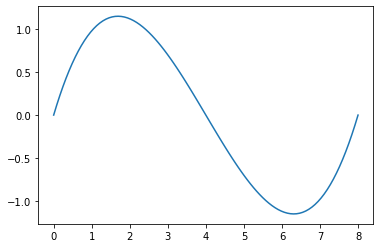

In [41]:
def deCasteljau(P,t):
    n = len(P)
    dim = len(P[0])
    Pvecs= [P]

    for k in range(1,n):
        P_vectors_k = np.zeros((n-k, dim))
        for i in range(n-k):
            P_vectors_k[i] = (1-t)*Pvecs[k-1][i] + t*Pvecs[k-1][i+1]
        Pvecs.append(P_vectors_k)
    return Pvecs[-1][0], Pvecs

t = np.linspace(0,1,100)
P = np.array([ [0,0], [2,3], [4,0], [6, -3], [8,0]] )
Pvecs= [P]


#test = deCasteljau(P,1/3)

beziercurve=np.zeros((len(t),2))
for i in range(len(t)):
    beziercurve[i] = deCasteljau(P, t[i])[0]

plt.plot(beziercurve[:,0], beziercurve[:,1])
plt.show()

6. Consider a _composite Bézier curve_ $\mathbf s(t)$ as described in the beginning of this problem. Assume we want $\mathbf s(t)$ to be a $C^{(k)}$, $k=0,1,2$ function. Then surely, increasing the class $k$ increases the dependent properties we have to impose.
   1. What are the critical points of $\mathbf s(t)$ to investigate for the property to be a $C^{(k)}$ function?
   2. Which properties have to hold for continuity ($k=0$)? 
   3. Which properties have to hold for $\mathbf s(t)$ to be continuously differentiable ($k=1$) ?
   4. Which properties have to hold for $\mathbf s(t)$ to be twice continuously differentiable ($k=2$) ?
   
   Try to simplify the conditions for the third and fourth point based on the properties you derived before.
   
   5. What changes if we want $\mathbf s(t)$ to be periodic, i.e. $s(t) = s(2+t)$ for all $t$ for the continous differentiability case $k=1$? 

1)

Since we have calculated bot $c'(t), c''(t), d'(t), d''(t)$ the only critical point left to evaluate is $s(1)$ to make sure $s(t)$ is a $C^k$ function. 

2)

For continuity we must have that the derivatives equal in the connection point. That is 
$$
lim_{t\rightarrow1^+}s(t) = lim_{t\rightarrow1^-}s(t)=s(1) \iff c(1)=d(0) \iff p_n=q_0
$$

3)

For $s(t)$ to be continously differentiable we must have $s'(t)$ continous in the connection point, i.e.:
$$
lim_{t\rightarrow1^+}s'(t) = lim_{t\rightarrow1^-}s'(t)=s'(1) \iff c'(1)=d'(0) 
$$

4)

For $s(t)$ to be twice continously differentiable we must have $s''(t)$ continous in the connection point, i.e.:
$$
lim_{t\rightarrow1^+}s''(t) = lim_{t\rightarrow1^-}s''(t)=s''(1) \iff c''(1)=d''(0) 
$$

By recalling that we differentiated $c(t), d(t)$ earlier:
$$\mathbf c'(0) = n(\mathbf p_1-\mathbf p_0),$$

$$\mathbf c''(0) = n(n-1)(\mathbf p_0-2\mathbf p_1 + \mathbf p_2),$$

$$\mathbf c'(1) = n(\mathbf p_n-\mathbf p_{n-1}),$$

$$\mathbf c''(1) = n(n-1)(\mathbf p_n-2\mathbf p_{n-1} + \mathbf p_{n-2}).$$

we may express 3) and 4) as such:

3)
$$
n(\mathbf p_n-\mathbf p_{n-1})=n(\mathbf q_1-\mathbf q_0)
$$

4)
$$
n(n-1)(\mathbf p_n-2\mathbf p_{n-1} + \mathbf p_{n-2})=n(n-1)(\mathbf q_0-2\mathbf q_1 + \mathbf q_2)
$$

## Problem 3: Interpolation with (composite, cubic) Bézier curves

The most prominent variant are – similar to $B$ splines – again those Bézier curves that yield cubic polynomials, i.e. $\mathbf b_3(t; \mathbf p_0,\mathbf p_1,\mathbf p_2,\mathbf p_3)$. To obtain a spline, we consider _composite Bézier curves_, i.e. we “stitch together” several Bézier curves (as considered for the case of 2 curves in the last problem):

Given a number $m$ of segments and $\mathbf p_{0,i}, \mathbf p_{1,i}, \mathbf p_{2,i}, \mathbf p_{3,i}$ for $i=1,\ldots,m$, then we define

$$
\mathbf B(t) = \begin{cases} \ & \\
b_3(t-i+1; \mathbf p_{0,i}, \mathbf p_{1,i}, \mathbf p_{2,i}, \mathbf p_{3,i})   
& \text{ for } i-1 \leq t < i \text{ and each } i=1,\ldots,m\\
& \\
\end{cases}
$$

1. Implement a function `compositeBézier(P, t)` that evaluates $\mathbf B(t), t\in [0,m]$, where $P = (\mathbf p_{j,i})_{j=0, i=1}^{3,m}$ denotes a matrix of control points. Note that you can obtain the degree and the number of segments from the size of `P`.
   
   Test your function with the 3-segment cubic composite B spline given by
   $$
   \begin{aligned}
   \mathbf p_{0,1} &= \begin{pmatrix} -1\\0\end{pmatrix},\quad
   \mathbf p_{1,1} &= \begin{pmatrix} -1\\\frac{1}{3}\end{pmatrix},\quad
   \mathbf p_{2,1} &= \begin{pmatrix} -\frac{1}{3}\\1\end{pmatrix},\quad
   \mathbf p_{3,1} &= \begin{pmatrix}  0\\1\end{pmatrix}\\
   \mathbf p_{0,2} &= \begin{pmatrix}  0\\1\end{pmatrix},\quad
   \mathbf p_{1,2} &= \begin{pmatrix}  \frac{1}{3}\\1\end{pmatrix},\quad
   \mathbf p_{2,2} &= \begin{pmatrix}  1\\\frac{1}{3}\end{pmatrix},\quad
   \mathbf p_{3,2} &= \begin{pmatrix}  0\\1\end{pmatrix}\\
   \mathbf p_{0,3} &= \begin{pmatrix}  0\\1\end{pmatrix},\quad
   \mathbf p_{1,3} &= \begin{pmatrix}  -\frac{1}{3}\\1\end{pmatrix},\quad
   \mathbf p_{2,3} &= \begin{pmatrix} \frac{1}{3}\\-1\end{pmatrix},\quad
   \mathbf p_{3,3} &= \begin{pmatrix}  0\\-1\end{pmatrix}\\
   \end{aligned}
   $$
   and plot the resulting (complete) curve $\mathbf B$.

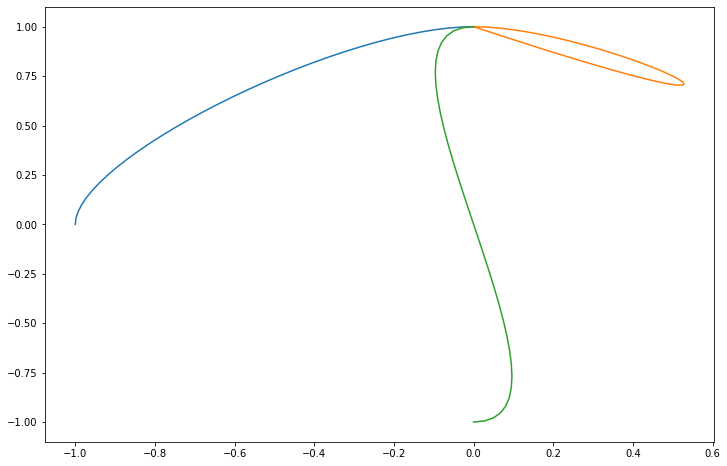

In [42]:
def compositeBezier(P, t):
    step = round(len(t) / len(P))
    bernsteins = [Bernstein(j, 3, t[0:round(len(t) / len(P))+1]) for j in range(4)]
    c = []
    for l in range(2): # For the x and y component
        cc = []
        for interval in P: # For every time-interval - create c(t)
            x = np.array(interval)[:, l]  # Retrieve the x / y component of the points in the interval
            list_interval_sum = x[0] * bernsteins[0] # initialize c(t) 
            for j in range(1, len(x)):
                list_interval_sum += x[j] * bernsteins[j]
            cc.append(list_interval_sum)
        c.append(cc)
    return c[0], c[1]


Matrix = [
    [
        [-1, 0],
        [-1, 1/3],
        [-1/3, 1],
        [0,1]
    ],
    [
        [0, 1],
        [1/3, 1],
        [1, 1/3],
        [0,1]
    ],
    [
        [0, 1],
        [-1/3, 1],
        [1/3, -1],
        [0,-1]
    ]
]
timeline = np.linspace(0,3, 100)
compx, compy = compositeBezier(Matrix, timeline)
plt.figure(figsize=(12,8))
for i in range(len(compy)):
    plt.plot(compx[i], compy[i])
plt.show()

#for j in range(4):
    #print(t[0:round(len(t) / len(Matrix))+1])
    #print(Bernstein(j, 3, t[0:round(len(t) / len(Matrix))+1]))

2. Use the properties derived so far to derive an algorithm for the following problem:
   
   Given data points $\mathbf a_0,\ldots,\mathbf a_{m-1} \in \mathbb R^d$ and velocities $\mathbf v_0, \mathbf v_1, \ldots, \mathbf v_{m-1}, \in \mathbb R^d$.
   
   Find the _periodic composite cubic Bézier curve_ $\mathbf B(t)$ that maps from $[0,m]$ to $\mathbb R^d$ with the following properties
   * $\mathbf B(0) = \mathbf B(m),$
   * $\mathbf B'(0) = \mathbf B'(m),$
   * $\mathbf B(i) = \mathbf a_i$ for $i=0,\ldots,m-1,$
   * $\mathbf B'(i) = \mathbf v_i$ for $i=0,\ldots,m-1.$

   You can for example first sketch the algorithm or a few ideas in $\LaTeX$.
   
   Then implement a function `interpolate_periodic(A,V)` where `A` is the vector of the interpolation points $[\mathbf a_0,\ldots,\mathbf a_{m-1}]$ and `V` is the vector of the velocities $[\mathbf v_0,\ldots,\mathbf v_{m-1}]$.   
   The function should return a matrix `P` like in the first part to be able to plot the result.

A composite cubic will be a Bezier curve with cubic curves between each point. On each interval our expression for the Bezier curve is 
$$
B_i =(1-t)^3P_i + 3t(1-t)^2C_i + 3t^2(1-t)D_i + t^3P_{i+1}=a_i
$$
Where $C_i, D_i$ are points inbetween the control points. By plugging in the boundary value $t=0$ we see that
$$
a_i=P_i
$$
Which will be our starting point in each Bezier curve. If $t=1$ we have made a new jump and we can see that for 

$i=0, t=1, a_{i+1}=P_{i+1}$ is equivalent to $i=1, t=0, a_{i}=P_{i}$ so the boundary at $t=1$ is not needed yet.

We know that $C_i$ and $D_i$ are determined by the velocities of $t$ so we find the derivative:
$$
\frac{dB_i}{dt} =-3(1-t)^2P_i + (3(1-t)^2 - 6t(1-t))C_i + (6t(1-t) - 3t^2)D_i + 3t^2P_{i+1} = v_i
$$
and we have the boundary points of $t=0, t=1$ which when plugged in results in the following
$$
C_i=\frac{v_i}{3} + P_i
$$
$$
D_i=P_{i+1} - \frac{v_{i+1}}{3}
$$
By plugging in both $a_i$ and $C_i, D_i$ we get the expression for our Bezier curve:
$$
B_i=(1-t)^3a_i + 3t(1-t)^2(a_i +\frac{v_i}{3}) + 3t^2(1-t)(a_{i+1} - \frac{v_{i+1}}{3}) + t^3a_{i+1}
$$
Simplify
$$
B_i=(1-t)^2(1+2t)a_i + t(1-t)^2v_i + t^2(1-t)v_{i+1} + t^3(3-2t)a_{i+1}
$$

In [ ]:
def interpolate_periodic(A, V):
    

3. Take your favourite letter from the alphabet. Draw its outline – 
i.e. a closed curve surrounding the letter– on a graph paper (those with a regular 2D grid) and take a few measurements of points and velocities. Use this data to illustrate how your function from 2 works. 

   _Hint_: a good idea is to take a letter without holes that only consist of one component like `t` or `T` (maybe not the little boring `l`).
    
   _Bonus Task_: Ignore the hint and do something fancy with `å`, `æ`, `ø`, or even `ß` (though that can be done with one outline in most this fonts).

4. Take the resulting control points from part 3 of this problem and create the following new curves with new sets of points given by
   1. `Q` where each $\mathbf q_{i,j} = 2\mathbf p_{i,j}$
   2. `R` where each $\mathbf r_{i,j} = \begin{pmatrix} \cos\frac{\pi}{4} & -\sin\frac{\pi}{4}\\ \sin\frac{\pi}{4} & \cos\frac{\pi}{4}\end{pmatrix}\mathbf p_{i,j}$
   3. `S` where each $\mathbf s_{i,j} = \begin{pmatrix} 1 & \frac{1}{2}\\ 1 & 0\end{pmatrix}\mathbf p_{i,j} + \frac{1}{2}\begin{pmatrix}1\\1\end{pmatrix}$
   4. `T` where each $\mathbf t_{i,j} = \begin{pmatrix} -1 & -\frac{1}{2}\\ 1 & 0\end{pmatrix}\mathbf p_{i,j} + \frac{1}{2}\begin{pmatrix}1\\-1\end{pmatrix}$
   where each $i=0,1,2,3$ and $j=0,\ldots,m-1$

## Problem 4: Optimisation with Bézier curves

Similar to Problem 3, assume we have a composite cubic Bézier curve $\mathbf B(t)$ (here just not necessarily periodic) with $m$ segments, i.e. control points $\mathbf p_{0,1}, \mathbf p_{1,1}, \mathbf p_{2,1}, \mathbf p_{3,1}, \mathbf p_{0,2}, \mathbf p_{1,2},\ldots,\mathbf p_{3,m}$.
We denote its segments by $\mathbf c_i\colon [i-1,i] \to \mathbb R^2$, for  $i=1,\ldots,m$.
Then $\mathbf B(t)$ is defined on $[0,m]$.
Assume further that $\mathbf B(t)$ is $C^{(1)}$.

1. Due to the property of $\mathbf B(t)$ being continuous, we have
   $\mathbf p_{3,i} = \mathbf p_{0,i+1}$ for $i=1,\ldots,m-1$, so we can omit “storing” the redundant data of $\mathbf p_{3,i}.$
   
   Similarly due to the differentiability we can express $\mathbf p_{2,i}$ using $\mathbf p_{0,i+1}$ and $\mathbf p_{1,i+1}$ for each $i=1,\ldots,m-1$. What does this expression look like?
   
   _Bonus question_: The “data” we store for $\mathbf p_{2,i}$ and/or $\mathbf p_{1,{i+1}}$ is just one vector in $\mathbb R^d$. Can we phrase this information in terms of the velocity $\mathbf v_{i+1}$ at $\mathbf p_{0,i+1}$, i.e. such that from this velocity we can recover both “neighboring” points?

2. We want to minimize the (squared) acceleration of the curve
   $$
   F(\mathbf P)
   =
   \int_{0}^{m} \lVert \mathbf B''(t) \rVert^2 \mathrm{d}t
   ,\qquad\text{for some}\quad\lambda > 0
   $$
   with respect to the remaining control points
   $$
   \mathbf P= [\mathbf p_{0,1}, \mathbf p_{1,1}, \mathbf p_{0,2}, \mathbf p_{1,2}, \ldots, \mathbf p_{0,m-1}, \mathbf p_{1,m-1} \mathbf p_{0,m}, \mathbf p_{1,m}, \mathbf p_{2,m}, \mathbf p_{3,m}, ].
   $$

   For simplicity we only consider one segment, i.e. for $\mathbf q_0,\mathbf q_1, \mathbf q_2, \mathbf q_3 \in \mathbb R^2$, we consider the cubic Bézier curve $\mathbf b_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)$.
   
   First derive a closed form for the integral
   
   $$
   \int_0^1 \lVert \mathbf b''_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) \rVert_2^2\ \mathrm{d} t
   $$
   
   in order to derive the gradient of 
   $$
   \tilde F (\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) = \int_0^1 \lVert \mathbf b''_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)\rVert_2^2 \ \mathrm{d} t
   $$
   and with respect to the control points $\mathbf q_i, i=0,\ldots,3$.
   
   While we do not want to write down the whole gradient of $F$, please sketch how you can use the result of $\tilde F$ to compute the gradient of $F$. Remember that $\mathbf B(t)$ is continuously differentiable.

3. Look at the first order optimality conditions of the optimisation task to minimize $\tilde F$ from the last part.
   How can we find such a minimiser?
   Is the solution unique?
   
   For the overall problem $F$ we even have to take into account the properties from the fist part. What about the solution now? Is it unique? You may argue intuitively here or provide a concrete example of two minimisers for a 2-segment curve, i.e. $m=2$.

4. Assume we extend the problem to have some (data) points $\mathbf d_i \in \mathbb R^2$, $i=0,\ldots,m$ given and we extend the problem to
   $$
   G_\lambda(\mathbf P)
   =
   \frac{\lambda}{2}\sum_{i=0}^{m} \lVert \mathbf d_i - \mathbf B(i) \rVert_2^2 + \int_{0}^{m} \lVert   \mathbf B''(t) \rVert^2 \mathrm{d}t
   ,\qquad\text{for some}\quad\lambda > 0
   $$
   
   We again can first look at the simplified problem: Given two points $\mathbf s, \mathbf e \in \mathbb R^2$ consider for some $\lambda > 0$ the function for one segment, namely
   
   $$
   \begin{split}
   \tilde G_\lambda(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) &= \frac{\lambda}{2}\Bigl( \lVert \mathbf s - \mathbf b_3(0; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) \rVert_2^2 + \lVert \mathbf e - \mathbf b_3(1; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) \rVert_2^2\Bigr) + \tilde F (\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)\\
   &=
   \frac{\lambda}{2}\Bigl( \lVert \mathbf s - \mathbf q_0 \rVert_2^2 + \lVert \mathbf e - \mathbf q_3 \rVert_2^2\Bigr) + \tilde F (\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)
   \end{split}
   $$
   
   Does this change the question about uniqueness?
   Without programming / testing, just intuitively:
   What does this model do, if you let $\lambda$ tend to zero? What does it do, if you let $\lambda$ tend to $\infty$?
   
   Similarly to part 3 of this problem, what does change for $G_\lambda$ in comparison to $F$ concerning uniqueness? what does the $\lambda$ change here (if very large or very small)?

5. Use the previous parts to derive a gradient descent algorithm to minimize $G_\lambda(\mathbf P)$ with respect to the control points $\mathbf P$. You may use a constant step size.

   Take as an example your letter from Problem 3 as input $\mathbf P$ for your algorithm and two different values of $\lambda$. How does the letter change?